<a href="https://colab.research.google.com/github/Swapna-2025/Random-Forest-Regression/blob/main/Boston_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library:-**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

**Load The Data:-**

In [ ]:
data=pd.read_csv('housingdata.csv')

In [ ]:
df=pd.DataFrame(data)

**Basic Info About Datadet:-**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**To Read Top 5 Rows:-**

In [ ]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**To Read Last 5 Rows:-**

In [ ]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


**Differentiate Between Dependent and Independent Variable:-**

In [ ]:
x = df.drop("MEDV", axis=1)  # all features
y = df["MEDV"]               # target variable

In [ ]:
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


**Train_Test_Split:-**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train)

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466   NaN   6.06   0.0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10   0.0  0.6140  6.103   NaN  2.0218   24  666   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147    5  384   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     1

In [ ]:
print(x_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
173   0.09178   0.0    NaN   0.0  0.510  6.416    NaN  2.6463    5  296   
274   0.05644  40.0   6.41   1.0  0.447  6.758   32.9  4.0776    4  254   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681    4  711   
72    0.09164   0.0  10.81   0.0  0.413  6.065    7.8  5.2873    4  305   
452   5.09017   0.0  18.10   0.0  0.713  6.297   91.8  2.3682   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
412  18.81100   0.0  18.10   0.0  0.597  4.628  100.0  1.5539   24  666   
436  14.42080   0.0  18.10   0.0  0.740  6.461   93.3  2.0026   24  666   
411  14.05070   0.0  18.10   0.0  0.597  6.657  100.0  1.5275   24  666   
86    0.05188   0.0   4.49   0.0  0.449  6.015   45.1  4.4272    3  247   
75    0.09512   0.0  12.83   0.0  0.437  6.286   45.0  4.5026    5  398   

     PTRATIO       B  LSTAT  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     2

In [ ]:
print(y_train)

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64


In [ ]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


**To Impute Missing Values With Mean:-**

In [ ]:
imputer = SimpleImputer(strategy='mean')

**Fit Impute To Data:-**

In [ ]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

**Train the Random Forest Regressor:-**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluate the Model:-**

In [ ]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 8.13


**Visualization:-**

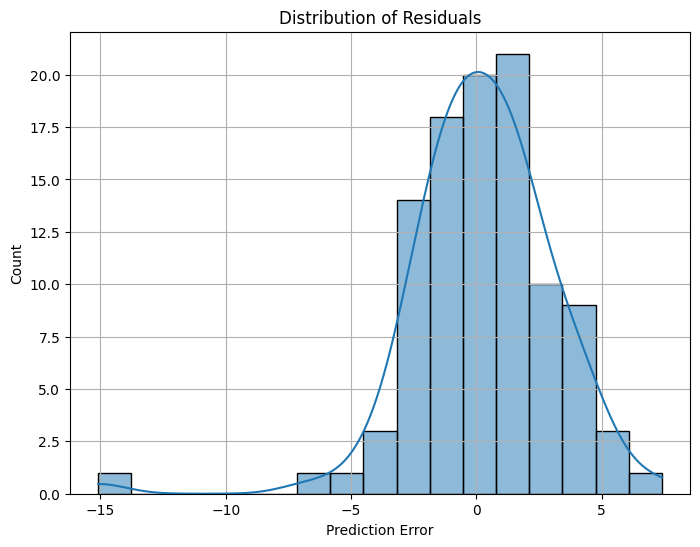

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()